In [1]:
# Import needed functionalities
import numpy as np
import pandas as pd
import scipy.spatial.distance as ssd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn import preprocessing
from sklearn.metrics import silhouette_samples, silhouette_score
from tqdm import tqdm

In [2]:
# Import datasets
data3Dfull = pd.read_csv('data/data3.csv')
data6Dfull = pd.read_csv('data/data6.csv')

df = pd.read_csv("data/data3.csv")

In [3]:
# method to sample a dataset (hardcoded seed for randomized selection, see alternatives in comment)
def get_sample_from_dataset(prop, dataset):
    # randomly define sample from dataset
    # good seeds to try: 13, 42, 1123, 5813, 213455
    np.random.seed(seed=42)
    # We are going to use bootstrapping
    sample_proportion =  prop
    dataset_size = len(dataset)
    sample_size = sample_proportion * dataset_size
    # perform scaling on the dataset
    dataset = preprocessing.scale(dataset)
    # Turn into a pandas array again
    d = {'V'+str(i+1) : dataset[:,i] for i in range(len(dataset[0]))}
    dataset = pd.DataFrame(d)
    
    print("The sample size we are going to use will be: "+ str(sample_size))
    # Run the sampling
    chosen_idx = np.random.choice(dataset_size, replace=False, size=int(sample_size))
    sampled_dataset =  dataset.iloc[chosen_idx]
    print("The new shape of the sampled dataset is: " + str(sampled_dataset.values.shape))
    return sampled_dataset

In [16]:
# Make train and test sets
data3D = get_sample_from_dataset(0.07, data3Dfull)
# trainidx = int(.8 * len(data3D))

# train = data3D[:trainidx]
# test = data3D[trainidx:]

The sample size we are going to use will be: 21000.000000000004
The new shape of the sampled dataset is: (21000, 3)


In [17]:
def dist(a,b, metric='euclidean'):
    dist = ssd.euclidean(a, b) if metric=='euclidean' else ssd.cityblock(a, b)
    return dist

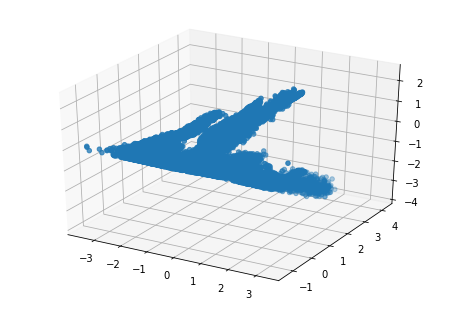

In [18]:
# Plot 3D figure
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data3D['V1'], data3D['V2'], data3D['V3'])

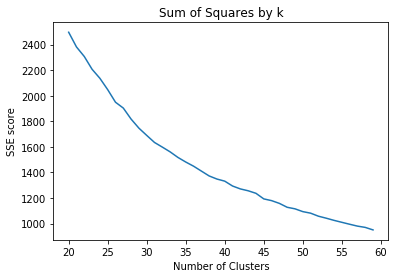

In [22]:
# Number of clusters
cluster_range = range(20,60)

# clustering and SSE score based elbow
# kmeans = [KMeans(n_clusters=k,random_state=42) for k in cluster_range]
# score_inertia = [kmeans[i].fit(data3D).inertia_ for i in tqdm(range(len(kmeans)))]

# ploting metric vs kmeans
fig = plt.figure()
plt.plot(cluster_range,score_inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE score')
plt.title('Sum of Squares by k')
plt.show()

# Predicting the clusters
# labels = kmeans.predict(data3D)
# Getting the cluster centers
# C = kmeans.cluster_centers_

In [20]:
# clustering and silhouette score based elbow    
silhouette_avg = []
# KMeans for cluster_range number of clusters
for k in tqdm(cluster_range):
    kmeans = KMeans(n_clusters=k,random_state=42) 
    # score of each KMeans method
    cluster_labels = kmeans.fit_predict(data3D)
    silhouette_avg.append(silhouette_score(data3D, cluster_labels))

100%|██████████| 40/40 [12:42<00:00, 19.06s/it]


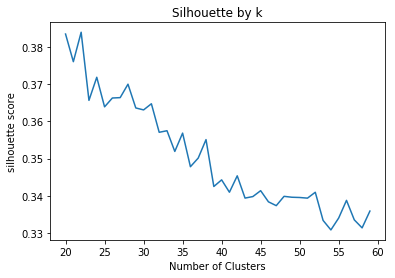

0.383951744721
0.330856244373
[ 1.          0.92562499  0.87731535  0.81261001  0.76702432  0.70965137
  0.64596904  0.61643643  0.56060297  0.5148129   0.47820665  0.44237707
  0.41895252  0.39485576  0.36672646  0.34350483  0.32248796  0.29773197
  0.27301593  0.25731089  0.24669932  0.22207023  0.20740876  0.198025
  0.18515362  0.15694767  0.14815118  0.13422746  0.11448626  0.10669482
  0.09258215  0.08472741  0.06944013  0.05931746  0.0483407   0.0385088
  0.02868481  0.01924975  0.01275323  0.        ]
[ 0.99091508  0.85106574  1.          0.65537732  0.77223349  0.62254747
  0.66732359  0.66921872  0.73716119  0.61703272  0.60710062  0.6381848
  0.49385874  0.501756    0.39703277  0.48975084  0.31974214  0.36342973
  0.45684556  0.2196232   0.25322907  0.19062922  0.27362521  0.16104047
  0.16868446  0.19850752  0.1420857   0.12273601  0.16986549  0.16530752
  0.16402509  0.16074033  0.19045062  0.04816357  0.          0.0602212
  0.14949648  0.05084863  0.01029013  0.09534083]

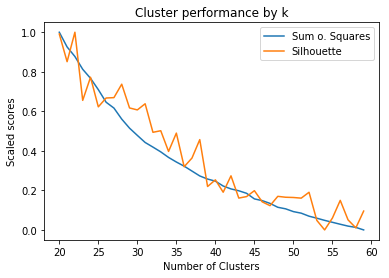

In [23]:
# ploting metric vs kmeans
fig = plt.figure()
plt.plot(cluster_range, silhouette_avg)
plt.xlabel('Number of Clusters')
plt.ylabel('silhouette score')
plt.title('Silhouette by k')
plt.show()

NameError: name 'labels' is not defined

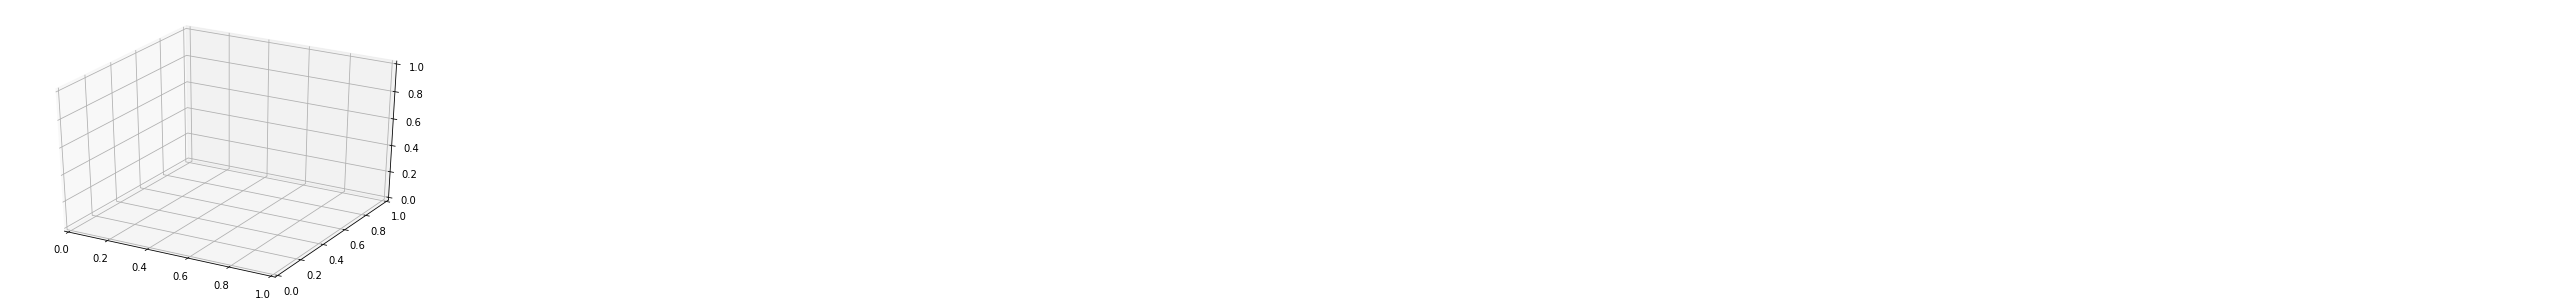

In [8]:
fig = plt.figure()
ax = Axes3D(fig)
#Instead of using colours for each predefined cluster, we use a colour for each predicted label
ax.scatter(data3D['V1'], data3D['V2'], data3D['V3'], c=labels)
# ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=1000)
# C is a matrix indexed as such
ax.scatter(C[:,0], C[:,1], C[:,2], marker='*', c='#050505', s=1000)